In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("../content/spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.rename(columns={'v1':'Label','v2':'Message'},inplace=True)

In [ ]:
data.head(5)

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

Label      0
Message    0
dtype: int64

In [ ]:
data.duplicated().sum()

403

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data['Label']=Encoder.fit_transform(data['Label'])

In [ ]:
data

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


([<matplotlib.patches.Wedge at 0x7f32bdc6ccd0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Not Spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')])

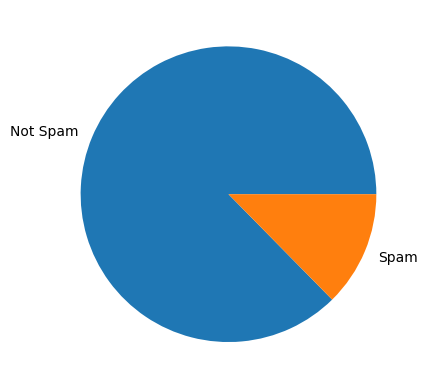

In [ ]:
plt.pie(data['Label'].value_counts(),labels=['Not Spam','Spam'])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
data['num_words']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head(5)
data['sent']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head(5)

,Label,Message,num_words,sent
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [ ]:
import seaborn as sns
data['num_character']=data['Message'].apply(len)

<ipython-input-17-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

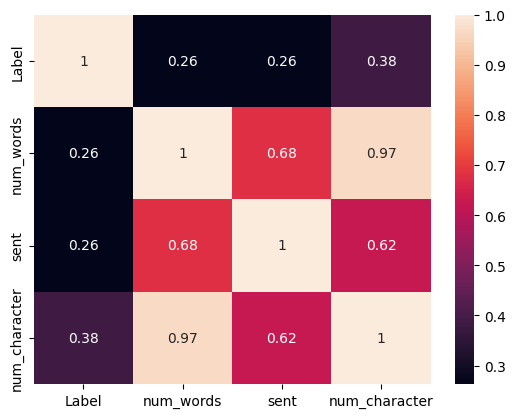

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#corr of Label and Num_character are more co related we will be taking the Char

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def Text_transform(message):
      message=message.lower()
      message=nltk.word_tokenize(message)
      y=[]
      for i in message:
          if i.isalnum():
             y.append(i)
          y.clear()
      for i in message:
          if i not in stopwords.words('english') and i not in string.punctuation:
              y.append(i)
      message=y[:]
      y.clear()
      for i in message:
          y.append(ps.stem(i))

      return " ".join(y)

In [ ]:
data['Transformed_Message']=data['Message'].apply(Text_transform)

In [ ]:
data['Transformed_Message'].shape

(5169,)

In [ ]:
#1 spam

In [ ]:
spam_corpus=[]
for msg in data[data['Label']==1]['Transformed_Message'].tolist():
    for word in msg.split():
      spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)



[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ("'s", 59),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(max_features=3000)
x=tfid.fit_transform(data['Transformed_Message']).toarray()
x.shape

(5169, 3000)

In [ ]:
y=data['Label'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=mn.predict(x_test)

In [ ]:
dit=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
dit

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1029,0,0
1030,0,0
1031,0,0
1032,0,0


In [ ]:
user_msg=input("Enter Message: ")

converted_msg=Text_transform(user_msg)


Enter Message: we made new offer its fully free and u can get nokia phone free free


In [ ]:
new_msg=tfid.transform([converted_msg])

In [ ]:
new_msg

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
yp=mn.predict(new_msg)
if(yp==0):
  print("Not Spam")
else:
  print("Spam")

Spam
